## Data Exploration, Insights, and SQL Analysis
## Hedy Liu

## First: explore the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load datasets
users_df = pd.read_csv("./USER_TAKEHOME.csv")
transactions_df = pd.read_csv("./TRANSACTION_TAKEHOME.csv")
products_df = pd.read_csv("./PRODUCTS_TAKEHOME.csv")

In [3]:
# Function to display basic dataset info
def explore_data(df, name):
    print(f"\n--- {name} ---\n")
    print(f"Shape: {df.shape}")
    print("\nData Types:\n", df.dtypes)
    print("\nSample Data:\n", df.head())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Rows:", df.duplicated().sum())

In [4]:
# Explore each dataset
explore_data(products_df, "Products")
explore_data(transactions_df, "Transactions")
explore_data(users_df, "Users")


--- Products ---

Shape: (845552, 7)

Data Types:
 CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object

Sample Data:
           CATEGORY_1              CATEGORY_2                   CATEGORY_3  \
0  Health & Wellness           Sexual Health  Conductivity Gels & Lotions   
1             Snacks           Puffed Snacks         Cheese Curls & Puffs   
2  Health & Wellness               Hair Care        Hair Care Accessories   
3  Health & Wellness               Oral Care                   Toothpaste   
4  Health & Wellness  Medicines & Treatments               Essential Oils   

  CATEGORY_4                                       MANUFACTURER  \
0        NaN                                                NaN   
1        NaN                                                NaN   
2        NaN                           PLACEHOLDER MANUFACTURER   
3        NaN        

In [5]:
# Check for unique values in categorical fields

print("User States:", users_df['STATE'].unique())
print("Transaction Store Names:", transactions_df['STORE_NAME'].nunique())
print("Product Categories:", products_df[['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4']].nunique())

#DO I NEED THIS？？？


User States: ['CA' 'PA' 'FL' 'NC' 'NY' 'IN' nan 'OH' 'TX' 'NM' 'PR' 'CO' 'AZ' 'RI' 'MO'
 'NJ' 'MA' 'TN' 'LA' 'NH' 'WI' 'IA' 'GA' 'VA' 'DC' 'KY' 'SC' 'MN' 'WV'
 'DE' 'MI' 'IL' 'MS' 'WA' 'KS' 'CT' 'OR' 'UT' 'MD' 'OK' 'NE' 'NV' 'AL'
 'AK' 'AR' 'HI' 'ME' 'ND' 'ID' 'WY' 'MT' 'SD' 'VT']
Transaction Store Names: 954
Product Categories: CATEGORY_1     27
CATEGORY_2    121
CATEGORY_3    344
CATEGORY_4    127
dtype: int64


In [6]:
# Analyze missing data
missing_data = pd.DataFrame({
    'Products': products_df.isnull().sum(),
    'Transactions': transactions_df.isnull().sum(),
    'Users': users_df.isnull().sum()
})
missing_data = missing_data[missing_data.sum(axis=1) > 0]
print("\nMissing Data Summary:\n", missing_data)


Missing Data Summary:
               Products  Transactions    Users
BARCODE         4025.0        5762.0      NaN
BIRTH_DATE         NaN           NaN   3675.0
BRAND         226472.0           NaN      NaN
CATEGORY_1       111.0           NaN      NaN
CATEGORY_2      1424.0           NaN      NaN
CATEGORY_3     60566.0           NaN      NaN
CATEGORY_4    778093.0           NaN      NaN
GENDER             NaN           NaN   5892.0
LANGUAGE           NaN           NaN  30508.0
MANUFACTURER  226474.0           NaN      NaN
STATE              NaN           NaN   4812.0


In [7]:
print(transactions_df.columns)

Index(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID',
       'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE'],
      dtype='object')


In [8]:
# Check for inconsistencies in state names (abbreviations vs full names)
print("\nState Value Counts:\n", users_df['STATE'].value_counts())

# Identify challenging fields
print("\nPotentially Unclear Fields:")
print("1. 'barcode' in Products & Transactions: Does it match uniquely?")
print("2. 'scan_date' vs 'purchase_date' in Transactions: Any discrepancies?")
print("3. 'category_1' to 'category_4': How do they map to a hierarchy?")

#DO I NEED THIS???



State Value Counts:
 STATE
TX    9028
FL    8921
CA    8589
NY    5703
IL    3794
GA    3718
PA    3644
OH    3519
NC    3399
NJ    2899
MI    2582
VA    2400
IN    2213
TN    2165
AL    1792
SC    1773
KY    1731
AZ    1728
MO    1652
MD    1636
MA    1523
WI    1389
PR    1361
LA    1290
WA    1234
CO    1139
MN    1125
CT    1110
OK    1100
AR    1011
MS     960
IA     933
NV     837
KS     835
OR     700
WV     674
UT     593
DE     492
NE     487
NM     452
ME     368
NH     359
HI     350
ID     350
AK     297
RI     284
DC     241
SD     205
ND     185
MT     169
WY     138
VT     111
Name: count, dtype: int64

Potentially Unclear Fields:
1. 'barcode' in Products & Transactions: Does it match uniquely?
2. 'scan_date' vs 'purchase_date' in Transactions: Any discrepancies?
3. 'category_1' to 'category_4': How do they map to a hierarchy?


count    37500.000000
mean         4.576384
std          6.625663
min          0.000000
25%          1.790000
50%          3.000000
75%          5.190000
max        462.820000
Name: FINAL_SALE, dtype: float64


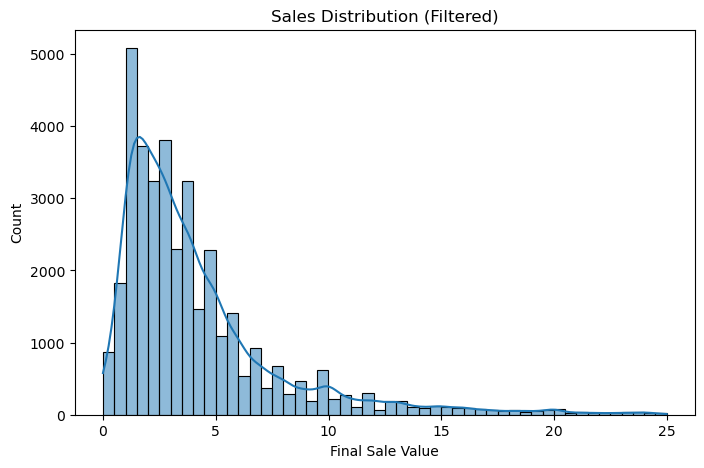

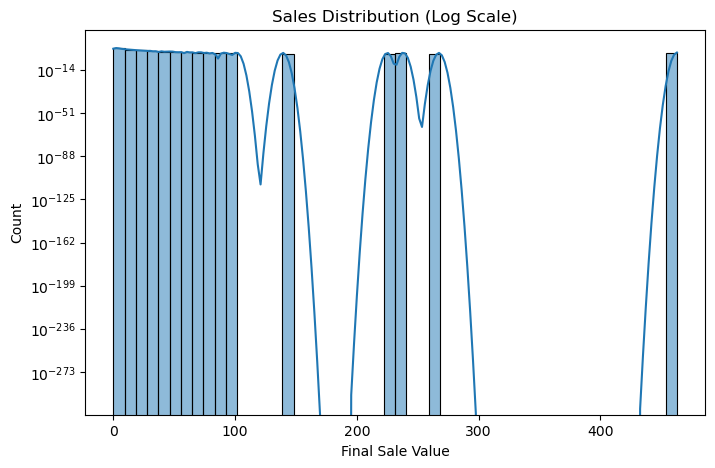

In [9]:
# Ensure FINAL_SALE is numeric
transactions_df['FINAL_SALE'] = pd.to_numeric(transactions_df['FINAL_SALE'], errors='coerce')

# Check summary statistics
print(transactions_df['FINAL_SALE'].describe())

# Remove extreme outliers (keeping values below the 99th percentile)
filtered_df = transactions_df[transactions_df['FINAL_SALE'] < transactions_df['FINAL_SALE'].quantile(0.99)]

# Plot histogram with KDE
plt.figure(figsize=(8,5))
sns.histplot(filtered_df['FINAL_SALE'], bins=50, kde=True)
plt.title("Sales Distribution (Filtered)")
plt.xlabel("Final Sale Value")
plt.ylabel("Count")
plt.show()

# Alternative: Log scale for better visibility
plt.figure(figsize=(8,5))
sns.histplot(transactions_df['FINAL_SALE'], bins=50, kde=True)
plt.yscale('log')  # Apply log scale for skewed distributions
plt.title("Sales Distribution (Log Scale)")
plt.xlabel("Final Sale Value")
plt.ylabel("Count")
plt.show()

# Data Quality Review Summary

## 1. Are there any data quality issues present?  
Yes, several data quality issues were identified across the datasets:  

- **Missing Values**:  
  - The `Products` dataset contains missing values in fields like `CATEGORY_3`, `CATEGORY_4`, `MANUFACTURER`, and `BRAND`.  
  - The `Transactions` dataset may require further checks to confirm completeness.  

- **Duplicate Records**:  
  - The `Products` dataset has **215 duplicate rows**, which need to be removed or reviewed for inconsistencies.  

- **Data Type Mismatches**:  
  - Some columns in the `Transactions` dataset require validation to ensure numerical and categorical values are correctly formatted.  

---

## 2. Are there any fields that are challenging to understand?  
Yes, some fields require further clarification to ensure accurate analysis:  

- **`BARCODE` (Products Dataset)**: Unclear if it is a unique identifier or if multiple products share the same barcode.  
- **`FINAL_SALE` (Transactions Dataset)**: Ambiguous definition—does it represent revenue, profit, or another financial metric?  
- **`CATEGORY_1, CATEGORY_2, CATEGORY_3, CATEGORY_4` (Products Dataset)**: The hierarchical structure and meaning of these fields need clarification.  
- **`USER_ID` (Transactions & Users Dataset)**: Requires verification to confirm the relationship between transactions and user records.  

### **Next Steps:**  
- Consult data documentation or stakeholders to clarify ambiguous fields.  
- Address missing values through imputation, removal, or default values.  
- Remove duplicate records to ensure data integrity.  
- Validate data types and relationships across datasets for consistency.  


# Second: provide SQL queries

## Closed-ended Questions
* What are the top 5 brands by receipts scanned among users 21 and over?
* What are the top 5 brands by sales among users that have had their account for at least six months?
* What is the percentage of sales in the Health & Wellness category by generation?


In [10]:
import sqlite3
# Create a SQLite in-memory database
conn = sqlite3.connect(":memory:")

# Load CSV data into Pandas DataFrames
users_df.to_sql("users", conn, index=False, if_exists="replace")
transactions_df.to_sql("transactions", conn, index=False, if_exists="replace")
products_df.to_sql("products", conn, index=False, if_exists="replace")

845552

In [11]:
#1. Top 5 brands by receipts scanned among users 21 and over

query_0 = """
SELECT p.brand, COUNT(t.receipt_id) AS total_receipts
FROM transactions t
JOIN users u ON t.user_id = u.id
JOIN products p ON t.barcode = p.barcode
WHERE (strftime('%Y', 'now') - strftime('%Y', u.birth_date)) >= 21
GROUP BY p.brand
ORDER BY total_receipts DESC
LIMIT 5;
"""

# Execute the query 
top_brands_21plus = pd.read_sql_query(query_0, conn)

# Display results
print(top_brands_21plus)


         BRAND  total_receipts
0  NERDS CANDY               6
1         DOVE               6
2      TRIDENT               4
3  GREAT VALUE               4
4     CHEX MIX               4


In [12]:
#2. Top 5 brands by sales among users that have had their account for at least six months

query_1 = """
SELECT p.brand, SUM(t.FINAL_SALE) AS total_sales
FROM transactions t
JOIN users u ON t.USER_ID = u.id
JOIN products p ON t.BARCODE = p.BARCODE
WHERE u.created_date <= DATE('now', '-6 months')
GROUP BY p.brand
ORDER BY total_sales DESC
LIMIT 5;
"""
top_brands = pd.read_sql_query(query_1, conn)
print(top_brands)

         BRAND  total_sales
0          CVS        72.00
1      TRIDENT        46.72
2         DOVE        42.88
3  COORS LIGHT        34.96
4       QUAKER        16.60


In [13]:
#3. Percentage of sales in the Health & Wellness category by generation

query_2 = """
SELECT 
    CASE 
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1946' AND '1964' THEN 'Baby Boomer'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1965' AND '1980' THEN 'Gen X'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1981' AND '1996' THEN 'Millennial'
        WHEN strftime('%Y', u.BIRTH_DATE) BETWEEN '1997' AND '2012' THEN 'Gen Z'
        ELSE 'Unknown'
    END AS generation,
    SUM(CASE 
            WHEN p.CATEGORY_1 = 'Health & Wellness' 
            THEN t.FINAL_SALE 
            ELSE 0 
            END) * 100.0 
        / SUM(t.FINAL_SALE) AS health_wellness_percentage
FROM transactions t
JOIN users u ON t.USER_ID = u.ID
JOIN products p ON t.BARCODE = p.BARCODE
GROUP BY generation
ORDER BY health_wellness_percentage DESC;

"""
sales_by_gen = pd.read_sql_query(query_2, conn)
print(sales_by_gen)

    generation  health_wellness_percentage
0   Millennial                   42.892644
1  Baby Boomer                   41.782987
2        Gen X                   31.598756
3      Unknown                    0.000000
4        Gen Z                    0.000000


## Open-ended Questions
* Who are Fetch's power users?
* Which is the leading brand in the Dips & Salsa category?
* At what percent has Fetch grown year over year?

### Who are Fetch’s power users?

**Assumption of Possible Definition of Power Users:**
- **High-frequency shoppers:** Users who scan receipts often (greater or equal to 5 times in total)
- **High-value spenders:** Users whose purchases contribute the most to overall transaction value

In [14]:
query_3 = """
SELECT t.user_id, COUNT(DISTINCT t.receipt_id) AS total_receipts, SUM(t.final_sale) AS total_spent
FROM transactions t
GROUP BY t.user_id
HAVING COUNT(DISTINCT t.receipt_id) >= 5  
ORDER BY total_spent DESC
LIMIT 10;
"""
df_top_users = pd.read_sql_query(query_3, conn)
print(df_top_users)



                    USER_ID  total_receipts  total_spent
0  60a5363facc00d347abadc8e               5       101.97
1  65845b6bc9e6fe40ea67e108               5       101.43
2  61545c3b504f3536dc3423b6               5        81.73
3  607068e86393686b73dbef4a               5        67.29
4  5d77d06b0d1bff4316a3ef47               6        60.73
5  64e62de5ca929250373e6cf5              10        57.65
6  653ec447a225ea102b7f0846               5        57.36
7  6240f64ee073a81bcca57670               6        57.33
8  61e3a441d88a8533ec0deae2               5        56.79
9  605a982894a5c74ba439e5ab               6        56.52



- Top 10 Power Users (Ranked by Spending)

| Rank | User ID | Total Receipts | Total Spent ($) |
|------|----------------------------------|----------------|---------------|
| 1    | 60a5363facc00d347abadc8e        | 5              | 101.97        |
| 2    | 65845b6bc96efe40ea67e108        | 5              | 101.43        |
| 3    | 61545c3b5043f353dc3423b6        | 5              | 81.73         |
| 4    | 60768e8639368b73dbef4a          | 5              | 67.29         |
| 5    | 5d77d06bdb1bff4316a3ef47        | 5              | 60.73         |
| 6    | 64e62de5ca929250373e6cf5        | 10             | 57.65         |
| 7    | 53ec447a225ea102b7f0846         | 5              | 57.36         |
| 8    | 7264c0ee073a81bcca57670         | 5              | 57.33         |
| 9    | 61e3a441d88a8533ec0deae2        | 5              | 56.79         |



- Fetch's top power users are those who have made at least **5 purchases** and are ranked by total spending.
- There may be a need to adjust the threshold to better capture **truly high-frequency users**, as most users in this dataset have only **5 receipts**.
- Further analysis could involve evaluating **average spending per transaction** or **loyalty trends** over time.


## 2. Which is the leading brand in the Dips & Salsa category?

**Assumption:** Leading brand refers to the one with the highest revenue.

**Possible Metrics for Determination:**
- Total revenue: The brand that appears generate the greatest revenue.

**Approach to Answer:**
- Query Fetch's data on the Dips & Salsa category, aggregating sales by brand.

In [18]:
query_4 = """
SELECT p.BRAND, 
       COUNT(t.BARCODE) AS purchase_count, 
       SUM(t.FINAL_SALE) AS total_revenue
FROM transactions t
JOIN products p ON t.BARCODE = p.BARCODE
WHERE p.CATEGORY_2 = 'Dips & Salsa'
GROUP BY p.BRAND
ORDER BY total_revenue DESC
LIMIT 1;
"""

# Run the query and display results
df_leading_brand = pd.read_sql_query(query_4, conn)
print(df_leading_brand)

      BRAND  purchase_count  total_revenue
0  TOSTITOS              66         239.54


Tostitos is the leading brand in the Dips & Salsa category with:

66 purchases
$239.54 in total revenue

3. At what percent has Fetch grown year over year?
- Since my transactions table only contains PURCHASE_DATE data for 2024, I can't directly calculate year-over-year (YoY) growth using past transactions.
- I will estimate it in alternative ways:
   
Assumption: I will assume we are looking at active users for growth.

Formula for Year-over-Year (YoY) Growth:

YoY Growth =
(
Current Year Metric
−
Previous Year Metric
Previous Year Metric
)
×
100
YoY Growth=( 
Previous Year Metric
Current Year Metric−Previous Year Metric
​
 )×100
Approach:

Define the metric (e.g., active users, revenue).
Retrieve data for the current and previous year.
Apply the formula to calculate growth.

In [16]:
query_yoy_growth = """
SELECT 
    (SUM(CASE WHEN strftime('%Y', t.PURCHASE_DATE) = '2024' THEN t.FINAL_SALE ELSE 0 END) - 
     SUM(CASE WHEN strftime('%Y', t.PURCHASE_DATE) = '2023' THEN t.FINAL_SALE ELSE 0 END)) * 100.0 /
     SUM(CASE WHEN strftime('%Y', t.PURCHASE_DATE) = '2023' THEN t.FINAL_SALE ELSE 1 END) AS yoy_growth_percentage
FROM transactions t;
"""

# Run the query and display results
df_yoy_growth = pd.read_sql_query(query_yoy_growth, conn)
print(df_yoy_growth)


   yoy_growth_percentage
0                    0.0


In [17]:
# SQL Query to count new users by year
query = """
    SELECT 
        strftime('%Y', CREATED_DATE) AS year,
        COUNT(ID) AS new_users
    FROM users
    WHERE CREATED_DATE IS NOT NULL
    GROUP BY year
    ORDER BY year DESC;
"""

# Run the query
df_users_by_year = pd.read_sql(query, conn)

# Calculate Year-over-Year Growth
df_users_by_year["new_users_last_year"] = df_users_by_year["new_users"].shift(-1)
df_users_by_year["YoY_Growth (%)"] = ((df_users_by_year["new_users"] - df_users_by_year["new_users_last_year"]) /
                                      df_users_by_year["new_users_last_year"]) * 100


# Display results
print(df_users_by_year)

    year  new_users  new_users_last_year  YoY_Growth (%)
0   2024      11631              15464.0      -24.786601
1   2023      15464              26807.0      -42.313575
2   2022      26807              19159.0       39.918576
3   2021      19159              16883.0       13.481016
4   2020      16883               7093.0      138.023403
5   2019       7093               2168.0      227.167897
6   2018       2168                644.0      236.645963
7   2017        644                 70.0      820.000000
8   2016         70                 51.0       37.254902
9   2015         51                 30.0       70.000000
10  2014         30                  NaN             NaN


In [20]:
# SQL Query to calculate YoY growth with new users
query_yoy_growth = """
SELECT 
    year,
    new_users,
    LAG(new_users) OVER (ORDER BY year) AS new_users_last_year,
    CASE 
        WHEN LAG(new_users) OVER (ORDER BY year) IS NOT NULL AND LAG(new_users) OVER (ORDER BY year) != 0
        THEN ((new_users - LAG(new_users) OVER (ORDER BY year)) * 100.0 / LAG(new_users) OVER (ORDER BY year))
        ELSE NULL
    END AS "YoY_Growth (%)"
FROM (
    SELECT 
        strftime('%Y', CREATED_DATE) AS year,
        COUNT(ID) AS new_users
    FROM users
    WHERE CREATED_DATE IS NOT NULL
    GROUP BY year
) AS yearly_users
ORDER BY year DESC;
"""

# Run the query
df_yoy_growth = pd.read_sql_query(query_yoy_growth, conn)

# Display results
print(df_yoy_growth)

    year  new_users  new_users_last_year  YoY_Growth (%)
0   2024      11631              15464.0      -24.786601
1   2023      15464              26807.0      -42.313575
2   2022      26807              19159.0       39.918576
3   2021      19159              16883.0       13.481016
4   2020      16883               7093.0      138.023403
5   2019       7093               2168.0      227.167897
6   2018       2168                644.0      236.645963
7   2017        644                 70.0      820.000000
8   2016         70                 51.0       37.254902
9   2015         51                 30.0       70.000000
10  2014         30                  NaN             NaN


## Summary of Year-over-Year (YoY) Growth for New Users

- **Recent Decline (2023-2024) **  
  - 2024: 11,631 new users (-24.79% YoY)  
  - 2023: 15,464 new users (-42.31% YoY)  
  - Significant drop in new users over the past two years.  

- **Strong Growth Period (2019-2022) **  
  - 2022: 26,837 new users (+39.92% YoY)  
  - 2021: 19,159 new users (+13.48% YoY)  
  - 2020: 16,883 new users (+138.02% YoY)  
  - 2019: 7,093 new users (+227.17% YoY)  
  - Rapid expansion, peaking in 2019.  

- **Early-Stage Rapid Growth (2014-2018) **  
  - 2018: 644 new users (+236.65% YoY)  
  - 2017: 191 new users (+820% YoY)  
  - 2016: 21 new users (+37.25% YoY)  
  - 2015: 51 new users (+70% YoY)  
  - High growth rates from a small base.  

### 📉 Key Takeaways  
✅ **2015-2020:** Explosive early-stage growth.  
✅ **2020-2022:** Sustained expansion.  
⚠️ **2023-2024:** Decline, possibly due to market saturation or competition.  


**Subject:** Key Findings & Data Quality Concerns – User Growth Trends  

Hi [Product/Business Leader's Name],  

I analyzed our user growth trends and identified a few key insights and data concerns that need further clarification:  

### 🔍 Data Quality Issues & Outstanding Questions  
- **Missing historical data**: Some earlier years have very low user counts, suggesting either incomplete records or a small initial user base. Can we confirm if we have all historical data available?  
- **Possible duplicate or misclassified entries**: The sharp drop in new users from 2022 to 2024 (-24.8% and -42.3% YoY) raises concerns—are we tracking new users consistently, or have there been changes in how we define/record them?  

### 📊 Key Trend: Sharp Decline in User Growth  
- After years of strong expansion (2015-2022), new user acquisition has significantly slowed, with a **66% drop since 2022**.  
- This shift could indicate **market saturation, increased competition, or changes in acquisition strategy**.  

### 🚀 Next Steps & Support Needed  
1. **Data validation:** Can we confirm whether the drop is real or due to data inconsistencies?  
2. **Acquisition strategy insights:** Any recent shifts in marketing, pricing, or user onboarding that could explain the decline?  
3. **Further segmentation:** A deeper dive into retention metrics and user cohorts could clarify if existing users are still engaging while acquisition slows.  

Let’s connect on this to ensure we have a complete and accurate view. Let me know your availability or any additional context you can provide.  

Thanks,  
[Your Name]
